## Importing The Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3 as sql

## Importing and Displaying Data

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

In [3]:
week_nums_2020_2021 = [201226, 210102, 210109, 210116]
Period_2020_2021 = get_data(week_nums_2020_2021)

In [4]:
week_nums_2019_2020 = [191228, 200104, 200111, 200118]
Period_2019_2020 = get_data(week_nums_2019_2020)

In [5]:
week_nums_2018_2019 = [181229, 190105, 190112, 190119]
Period_2018_2019 = get_data(week_nums_2018_2019)

### Add _PERIOD_ Column

In [6]:
Period_2020_2021['PERIOD'] = '2020-2021'
Period_2019_2020['PERIOD'] = '2019-2020'
Period_2018_2019['PERIOD'] = '2018-2019'

In [7]:
tmp_list = [Period_2020_2021, Period_2019_2020, Period_2018_2019]
All_df = pd.concat(tmp_list)

In [8]:
All_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,PERIOD
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/19/2020,03:00:00,REGULAR,7505644,2556326,2020-2021
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/19/2020,07:00:00,REGULAR,7505647,2556330,2020-2021
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/19/2020,11:00:00,REGULAR,7505683,2556378,2020-2021
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/19/2020,15:00:00,REGULAR,7505774,2556423,2020-2021
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/19/2020,19:00:00,REGULAR,7505939,2556447,2020-2021
...,...,...,...,...,...,...,...,...,...,...,...,...
204722,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/18/2019,04:00:00,REGULAR,5554,368,2018-2019
204723,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/18/2019,08:00:00,REGULAR,5554,368,2018-2019
204724,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/18/2019,12:00:00,REGULAR,5554,368,2018-2019
204725,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/18/2019,16:00:00,REGULAR,5554,368,2018-2019


## clean columns name

In [9]:
All_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'PERIOD'],
      dtype='object')

In [10]:
All_df.columns = All_df.columns.str.strip() 
All_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'PERIOD'],
      dtype='object')

### Check for null values

In [11]:
All_df.isnull().sum(axis = 0)

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
PERIOD      0
dtype: int64

### Add DATE_TIME object

In [12]:
All_df['DATE_TIME'] = pd.to_datetime(All_df.DATE + " " + All_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [13]:
All_df['DATE_OBJECT'] = pd.to_datetime(All_df.DATE)

In [14]:
All_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,PERIOD,DATE_TIME,DATE_OBJECT
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/19/2020,03:00:00,REGULAR,7505644,2556326,2020-2021,2020-12-19 03:00:00,2020-12-19
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/19/2020,07:00:00,REGULAR,7505647,2556330,2020-2021,2020-12-19 07:00:00,2020-12-19
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/19/2020,11:00:00,REGULAR,7505683,2556378,2020-2021,2020-12-19 11:00:00,2020-12-19
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/19/2020,15:00:00,REGULAR,7505774,2556423,2020-2021,2020-12-19 15:00:00,2020-12-19
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/19/2020,19:00:00,REGULAR,7505939,2556447,2020-2021,2020-12-19 19:00:00,2020-12-19


### Remove duplicates

In [15]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(All_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
17320,A011,R080,01-00-00,57 ST-7 AV,2018-12-30 15:00:00,2
1720721,R162,R166,00-00-00,79 ST,2020-12-30 00:00:00,2
1721209,R162,R166,00-00-01,79 ST,2020-12-31 00:00:00,2
1720724,R162,R166,00-00-00,79 ST,2020-12-30 12:00:00,2
1210885,N512,R163,00-00-00,14 ST,2021-01-15 11:00:00,2


In [16]:
All_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
All_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION",'DATE_TIME'], inplace=True)

In [17]:
All_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,PERIOD,DATE_TIME,DATE_OBJECT
209880,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/15/2021,20:00:00,REGULAR,5554,544,2020-2021,2021-01-15 20:00:00,2021-01-15
209879,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/15/2021,16:00:00,REGULAR,5554,544,2020-2021,2021-01-15 16:00:00,2021-01-15
209878,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/15/2021,12:00:00,REGULAR,5554,544,2020-2021,2021-01-15 12:00:00,2021-01-15
209877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/15/2021,08:00:00,REGULAR,5554,544,2020-2021,2021-01-15 08:00:00,2021-01-15
209876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/15/2021,04:00:00,REGULAR,5554,544,2020-2021,2021-01-15 04:00:00,2021-01-15


### drop unregular data

In [18]:
All_df.DESC.value_counts()

REGULAR       2466295
RECOVR AUD       9943
Name: DESC, dtype: int64

In [19]:
All_df = All_df.loc[All_df['DESC'] == 'REGULAR',:]

In [20]:
All_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,PERIOD,DATE_TIME,DATE_OBJECT
209880,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/15/2021,20:00:00,REGULAR,5554,544,2020-2021,2021-01-15 20:00:00,2021-01-15
209879,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/15/2021,16:00:00,REGULAR,5554,544,2020-2021,2021-01-15 16:00:00,2021-01-15
209878,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/15/2021,12:00:00,REGULAR,5554,544,2020-2021,2021-01-15 12:00:00,2021-01-15
209877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/15/2021,08:00:00,REGULAR,5554,544,2020-2021,2021-01-15 08:00:00,2021-01-15
209876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/15/2021,04:00:00,REGULAR,5554,544,2020-2021,2021-01-15 04:00:00,2021-01-15


In [21]:
All_df.DESC.value_counts()

REGULAR    2466295
Name: DESC, dtype: int64

### drop unnecessary columns

In [22]:
All_df = All_df.drop(["LINENAME", "DESC"], axis=1, errors="ignore")

In [23]:
All_df.head()

,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,ENTRIES,EXITS,PERIOD,DATE_TIME,DATE_OBJECT
209880,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,01/15/2021,20:00:00,5554,544,2020-2021,2021-01-15 20:00:00,2021-01-15
209879,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,01/15/2021,16:00:00,5554,544,2020-2021,2021-01-15 16:00:00,2021-01-15
209878,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,01/15/2021,12:00:00,5554,544,2020-2021,2021-01-15 12:00:00,2021-01-15
209877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,01/15/2021,08:00:00,5554,544,2020-2021,2021-01-15 08:00:00,2021-01-15
209876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,01/15/2021,04:00:00,5554,544,2020-2021,2021-01-15 04:00:00,2021-01-15


### Add _ENTRIES_PER_DAY_ and _EXITS_PER_DAY_ columns

In [24]:
# gets the number of entries and exits

ENTRIES_PER_DAY = (All_df.groupby(['PERIOD','DATE_OBJECT','STATION','C/A','UNIT','SCP']).ENTRIES.max() - All_df.groupby(['PERIOD','DATE_OBJECT','STATION','C/A','UNIT','SCP']).ENTRIES.min()).reset_index()
EXITS_PER_DAY = (All_df.groupby(['PERIOD','DATE_OBJECT','STATION','C/A','UNIT','SCP']).EXITS.max() - All_df.groupby(['PERIOD','DATE_OBJECT','STATION','C/A','UNIT','SCP']).EXITS.min()).reset_index()

In [25]:
# merge Them
All_df = pd.merge(ENTRIES_PER_DAY, EXITS_PER_DAY, how='outer')

In [26]:
All_df.sample(5)

,PERIOD,DATE_OBJECT,STATION,C/A,UNIT,SCP,ENTRIES,EXITS
97808,2018-2019,2019-01-11,BROADWAY JCT,N124,R103,00-03-00,1253,757
366883,2020-2021,2021-01-07,5 AV/53 ST,N304,R015,01-03-00,292,483
136718,2019-2020,2019-12-21,DEKALB AV,H023,R236,00-06-01,1499,103
205953,2019-2020,2020-01-04,HARLEM 148 ST,R309,R345,00-00-01,674,546
38961,2018-2019,2018-12-30,34 ST-HUDSON YD,R551,R072,01-00-00,13,2


### Add _WEEKDAY_ and _WEEKDAY_INDEX_ Columns 
Also, rename some columns to more meaningful names

In [27]:
## append weekday and traffic column to dataset, and rename of ENTRIES and EXITS to more meaningful name

All_df['WEEKDAY'] = pd.to_datetime(All_df['DATE_OBJECT']).dt.day_name()
All_df['WEEKDAY_INDEX'] = pd.to_datetime(All_df['DATE_OBJECT']).dt.weekday
All_df.rename(columns={'ENTRIES':'ENTRIES_PER_DAY'}, inplace=True)
All_df.rename(columns={'EXITS':'EXITS_PER_DAY'}, inplace=True)
All_df.rename(columns={'DATE_OBJECT':'DATE'}, inplace=True)

In [28]:
All_df.sample(5)

,PERIOD,DATE,STATION,C/A,UNIT,SCP,ENTRIES_PER_DAY,EXITS_PER_DAY,WEEKDAY,WEEKDAY_INDEX
154954,2019-2020,2019-12-25,59 ST COLUMBUS,R158,R084,00-00-01,508,749,Wednesday,2
230911,2019-2020,2020-01-09,METROPOLITAN AV,N409,R268,00-00-05,606,603,Thursday,3
69923,2018-2019,2019-01-05,FULTON ST,R114,R028,02-00-02,52,253,Saturday,5
224213,2019-2020,2020-01-08,B'WAY-LAFAYETTE,N519A,R461,01-05-03,0,0,Wednesday,2
302875,2020-2021,2020-12-25,ASTORIA DITMARS,R515,R095,00-03-01,141,168,Friday,4


In [29]:
All_df.head()

,PERIOD,DATE,STATION,C/A,UNIT,SCP,ENTRIES_PER_DAY,EXITS_PER_DAY,WEEKDAY,WEEKDAY_INDEX
0,2018-2019,2018-12-22,1 AV,H007,R248,00-00-00,2059,2559,Saturday,5
1,2018-2019,2018-12-22,1 AV,H007,R248,00-00-01,2680,1180,Saturday,5
2,2018-2019,2018-12-22,1 AV,H007,R248,00-03-00,522,722,Saturday,5
3,2018-2019,2018-12-22,1 AV,H007,R248,00-03-01,451,159,Saturday,5
4,2018-2019,2018-12-22,1 AV,H007,R248,00-03-02,758,55,Saturday,5


### Look at and Remove the Outliers

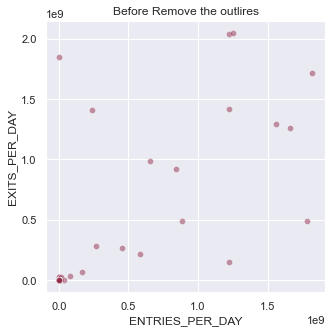

In [30]:
#Creating bubble plot
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(data=All_df, x="ENTRIES_PER_DAY", y="EXITS_PER_DAY", alpha = .5, color='#932e4d')
#Adding the aesthetics
plt.title('Before Remove the outlires')
plt.xlabel('ENTRIES_PER_DAY')
plt.ylabel('EXITS_PER_DAY') 
# Show the plot
plt.show()

In [31]:
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print('lower_limit >>>> ', lower_limit)
    print('upper_limit >>>> ', upper_limit)
    print('anomaly_cut_off >>>> ', anomaly_cut_off)
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [32]:
## method to drop the outliers 

def drop_outliers(outliers, df, colName):
    tmp = df
    for outlier in outliers:
        df = df.loc[df[colName] != outlier, :]
    print(len(tmp) - len(df), ' of ', len(tmp), 'rows dropped')
    return df

In [33]:
All_df = drop_outliers(find_anomalies(All_df['ENTRIES_PER_DAY']), All_df, 'ENTRIES_PER_DAY')

lower_limit >>>>  -21113270.794825796
upper_limit >>>>  21193714.285172436
anomaly_cut_off >>>>  21153492.539999116
18  of  410479 rows dropped


In [34]:
All_df = drop_outliers(find_anomalies(All_df['EXITS_PER_DAY']), All_df, 'EXITS_PER_DAY')

lower_limit >>>>  -8639702.066969816
upper_limit >>>>  8651001.102829494
anomaly_cut_off >>>>  8645351.584899655
9  of  410461 rows dropped


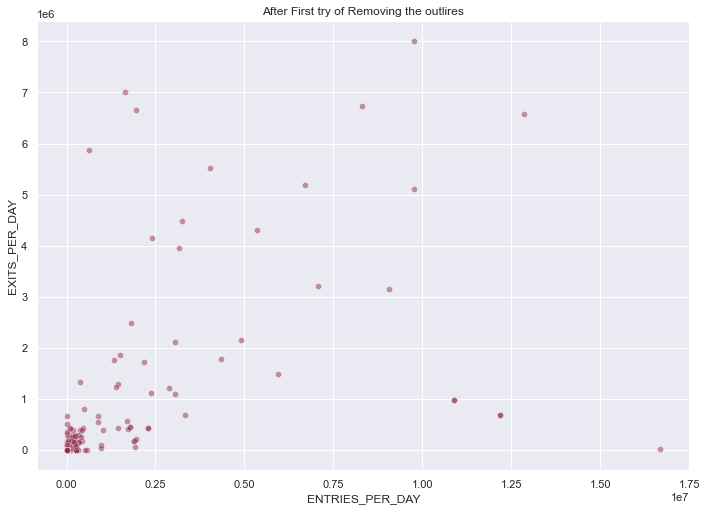

In [35]:
#Creating bubble plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=All_df, x="ENTRIES_PER_DAY", y="EXITS_PER_DAY", alpha = .5, color='#932e4d')
#Adding the aesthetics
plt.title('After First try of Removing the outlires')
plt.xlabel('ENTRIES_PER_DAY')
plt.ylabel('EXITS_PER_DAY') 
# Show the plot
plt.show()

In [36]:
All_df = drop_outliers(find_anomalies(All_df['ENTRIES_PER_DAY']), All_df, 'ENTRIES_PER_DAY')

lower_limit >>>>  -190528.2065658667
upper_limit >>>>  192897.39530413575
anomaly_cut_off >>>>  191712.80093500123
78  of  410452 rows dropped


In [37]:
All_df = drop_outliers(find_anomalies(All_df['EXITS_PER_DAY']), All_df, 'EXITS_PER_DAY')

lower_limit >>>>  -6329.346141566663
upper_limit >>>>  7408.977263421361
anomaly_cut_off >>>>  6869.161702494012
227  of  410374 rows dropped


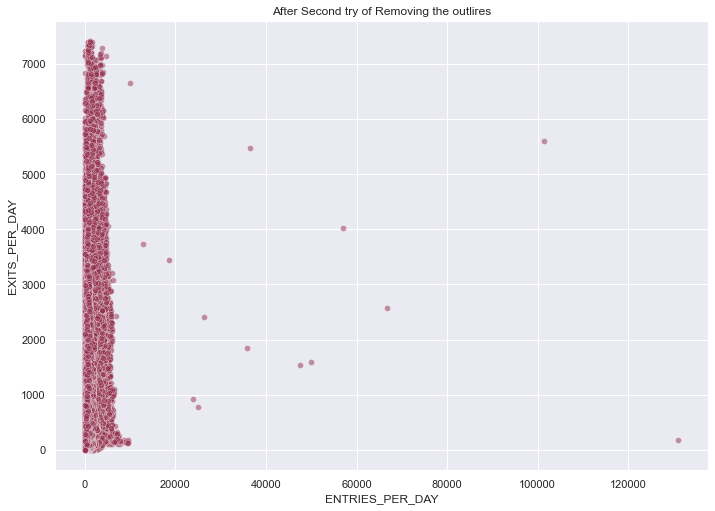

In [38]:
#Creating bubble plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=All_df, x="ENTRIES_PER_DAY", y="EXITS_PER_DAY", alpha = .5, color='#932e4d')
#Adding the aesthetics
plt.title('After Second try of Removing the outlires')
plt.xlabel('ENTRIES_PER_DAY')
plt.ylabel('EXITS_PER_DAY') 
# Show the plot
plt.show()

In [39]:
tmp = All_df
All_df = All_df.loc[All_df['ENTRIES_PER_DAY'] < 8000, :]

In [40]:
print(len(tmp) - len(All_df), ' of ', len(tmp), 'rows dropped')

21  of  410147 rows dropped


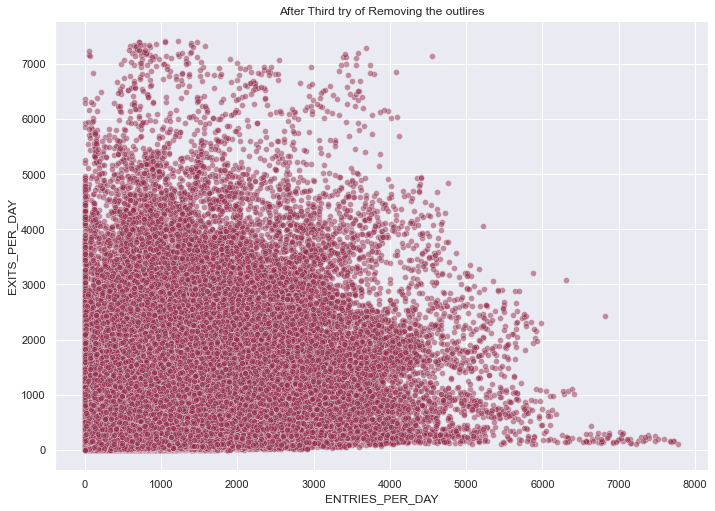

In [41]:
#Creating bubble plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=All_df, x="ENTRIES_PER_DAY", y="EXITS_PER_DAY", alpha = .5, color='#932e4d')
#Adding the aesthetics
plt.title('After Third try of Removing the outlires')
plt.xlabel('ENTRIES_PER_DAY')
plt.ylabel('EXITS_PER_DAY') 
# Show the plot
plt.show()

### Add _TRAFIC_ Columns

In [42]:
All_df['TRAFFIC'] = All_df['ENTRIES_PER_DAY'] + All_df['EXITS_PER_DAY']

<ipython-input-42-737d6757676e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_df['TRAFFIC'] = All_df['ENTRIES_PER_DAY'] + All_df['EXITS_PER_DAY']


In [43]:
All_df.head()

,PERIOD,DATE,STATION,C/A,UNIT,SCP,ENTRIES_PER_DAY,EXITS_PER_DAY,WEEKDAY,WEEKDAY_INDEX,TRAFFIC
0,2018-2019,2018-12-22,1 AV,H007,R248,00-00-00,2059,2559,Saturday,5,4618
1,2018-2019,2018-12-22,1 AV,H007,R248,00-00-01,2680,1180,Saturday,5,3860
2,2018-2019,2018-12-22,1 AV,H007,R248,00-03-00,522,722,Saturday,5,1244
3,2018-2019,2018-12-22,1 AV,H007,R248,00-03-01,451,159,Saturday,5,610
4,2018-2019,2018-12-22,1 AV,H007,R248,00-03-02,758,55,Saturday,5,813


### Display some statistical attributes

In [44]:
All_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410126 entries, 0 to 410478
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PERIOD           410126 non-null  object        
 1   DATE             410126 non-null  datetime64[ns]
 2   STATION          410126 non-null  object        
 3   C/A              410126 non-null  object        
 4   UNIT             410126 non-null  object        
 5   SCP              410126 non-null  object        
 6   ENTRIES_PER_DAY  410126 non-null  int64         
 7   EXITS_PER_DAY    410126 non-null  int64         
 8   WEEKDAY          410126 non-null  object        
 9   WEEKDAY_INDEX    410126 non-null  int64         
 10  TRAFFIC          410126 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 37.5+ MB


In [45]:
All_df.describe()

,ENTRIES_PER_DAY,EXITS_PER_DAY,WEEKDAY_INDEX,TRAFFIC
count,410126.000000,410126.000000,410126.000000,410126.000000
mean,631.123964,519.563407,2.999593,1150.687372
std,748.692148,705.108146,2.000282,1252.801788
min,0.000000,0.000000,0.000000,0.000000
25%,90.000000,72.000000,1.000000,235.000000
50%,371.000000,272.000000,3.000000,744.000000
75%,906.000000,683.000000,5.000000,1655.000000
max,7783.000000,7408.000000,6.000000,11695.000000


### Add the data set into SQLite

In [46]:
conn = sql.connect('All_df.db')

In [47]:
All_df.to_sql('All_df', conn)